In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Preprocessing the Data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Filling the missing values for numeric values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
#Filling the missing values for categorical values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

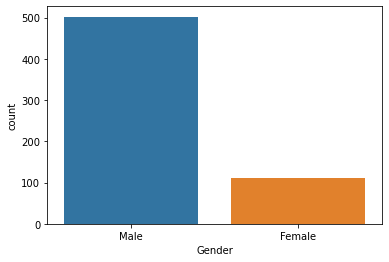

In [8]:
#Exploratory Data Analysis
sb.countplot(df['Gender'])

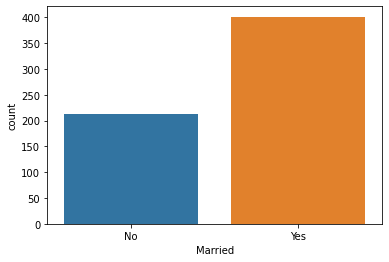

In [9]:
sb.countplot(df['Married'])

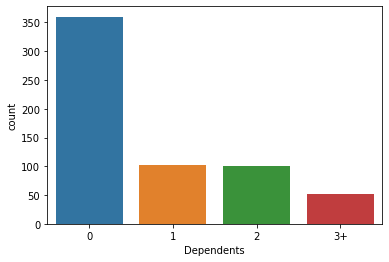

In [10]:
sb.countplot(df['Dependents'])

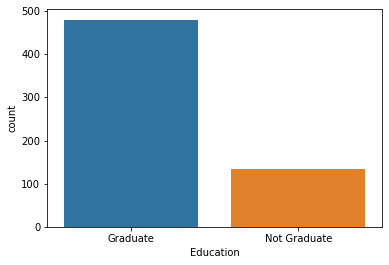

In [11]:
sb.countplot(df['Education'])

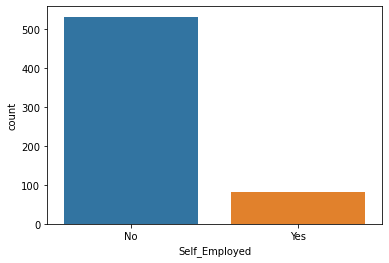

In [12]:
sb.countplot(df['Self_Employed'])

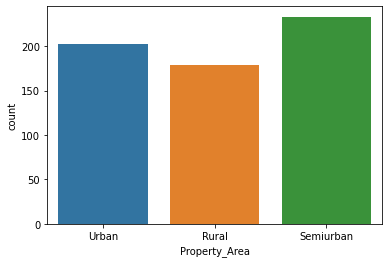

In [13]:
sb.countplot(df['Property_Area'])

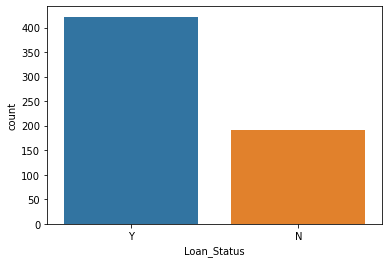

In [14]:
sb.countplot(df['Loan_Status'])

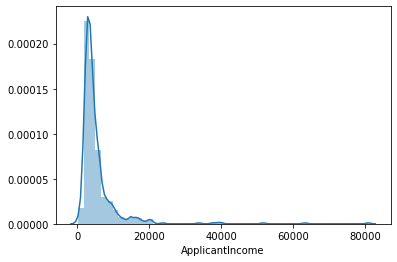

In [15]:
#Exploratory Data Analysis for categorical data
sb.distplot(df['ApplicantIncome'])

In [16]:
#The plot is left-skewed so we'll apply log transfromation
#df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

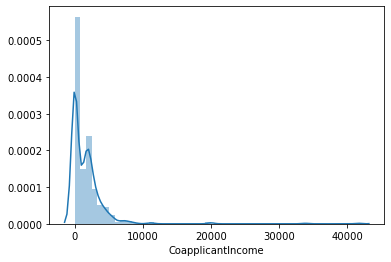

In [17]:
sb.distplot(df['CoapplicantIncome'])

In [18]:
#The plot is left-skewed so we'll apply log transfromation
#df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

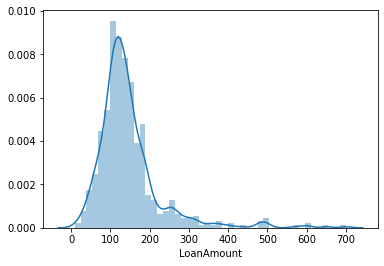

In [19]:
sb.distplot(df['LoanAmount'])

In [20]:
#The plot is left-skewed so we'll apply log transfromation
df['LoanAmount'] = np.log(df['LoanAmount'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


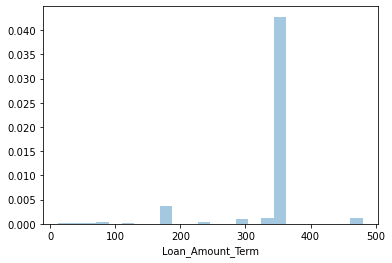

In [21]:
sb.distplot(df['Loan_Amount_Term'])

In [22]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


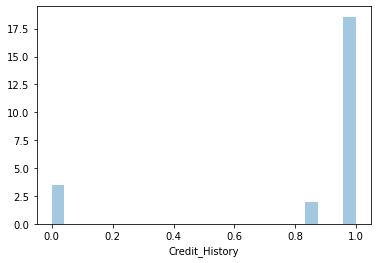

In [23]:
sb.distplot(df['Credit_History'])

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y


In [25]:
#Creating new attributes
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,4.262680,5.886104,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,3.688879,5.192957,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,5.533389,5.886104,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,5.231109,5.886104,1.0,Urban,Y,7583.0


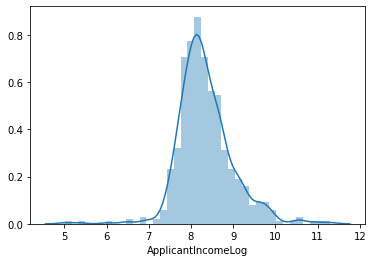

In [26]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sb.distplot(df['ApplicantIncomeLog'])

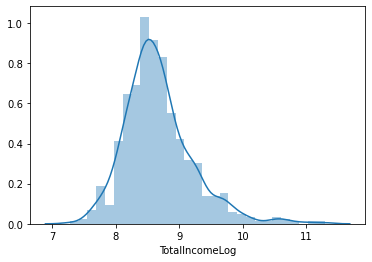

In [27]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])
sb.distplot(df['TotalIncomeLog'])

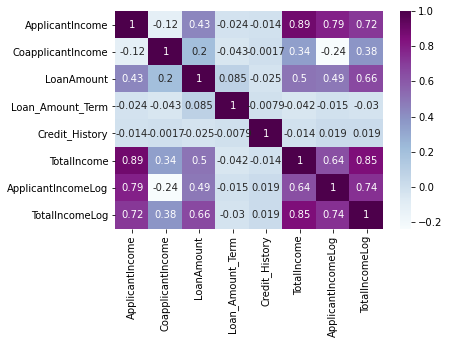

<Figure size 1080x720 with 0 Axes>

In [28]:
corr = df.corr()
sb.heatmap(corr ,annot = True ,cmap="BuPu")
plt.figure(figsize=(15,10))
plt.show()

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,Y,5849.0,8.674026,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,N,6091.0,8.430109,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,Y,3000.0,8.006368,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,Y,4941.0,7.856707,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,Y,6000.0,8.699515,8.699515


In [31]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalIncome", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515


# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515


# Train-Test Split

In [34]:
#Specifying input/output attributes
x = df.drop(columns=['Loan_Status'],axis = 1)
y  = df['Loan_Status']

In [35]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.25 ,random_state = 42)

# Model Training

In [36]:
#Classify the function
from sklearn.model_selection import cross_val_score
def classify(model ,x ,y):
    x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.25 ,random_state = 42)
    model.fit(x_train ,y_train)
    print("Accuracy : " ,model.score(x_test ,y_test)* 100)
    #cross-validation
    score = cross_val_score(model ,x ,y ,cv = 5)
    print("Cross validation : " ,np.mean(score) * 100)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model ,x ,y)

Accuracy :  77.27272727272727
Cross validation :  80.9462881514061


In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model ,x ,y)

Accuracy :  74.02597402597402
Cross validation :  71.50206584033053


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model ,x ,y)

Accuracy :  75.97402597402598
Cross validation :  77.69558843129415


# Hyperparameter Tuning

In [46]:
model  = RandomForestClassifier(n_estimators=25 ,min_samples_split = 25 ,max_depth = 7 ,max_features = 1 )
classify(model ,x ,y)

Accuracy :  75.97402597402598
Cross validation :  80.13328002132478


# Confusion Matrix

In [48]:
model = RandomForestClassifier(criterion='entropy' ,random_state=42)
model.fit(x_train ,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [52]:
y_pred = model.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26, 28],
       [ 7, 93]], dtype=int64)

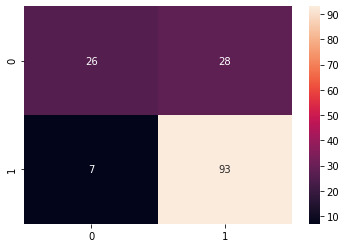

In [54]:
sb.heatmap(cm ,annot = True)